In [41]:
import pickle
import pandas as pd

with open('spotify_dataset_new.pkl', 'rb') as f:
    data = pickle.load(f)

In [42]:
data

,acousticness,valence,loudness,mode,key,speechiness,energy,instrumentalness,danceability,id,tempo,liveness,name,artist
0,0.806000,0.6010,-16.089,1,2,0.0324,0.19800,0.000000,0.507,5mnvqisoDJilY0uCEdT8rG,141.261,0.1020,Danny's Song,Loggins & Messina
1,0.021400,0.5050,-8.080,1,5,0.0296,0.67300,0.000444,0.542,5sY2beqWPiCRmTyjEkRPPZ,88.039,0.2810,To Find A Friend,Tom Petty
2,0.045700,0.9780,-4.906,1,9,0.0320,0.96000,0.000000,0.574,2Y90nL1ohB4sgYELDs7uNx,117.486,0.1210,Glory Days,Bruce Springsteen
3,0.225000,0.5020,-10.997,1,9,0.0528,0.51900,0.000004,0.630,0sDqo9UPzPUtu9wEkI3zRB,143.942,0.0974,The Weight - Remastered,The Band
4,0.002980,0.4910,-10.961,1,9,0.0378,0.76000,0.029400,0.380,24NwBd5vZ2CK8VOQVnqdxr,99.437,0.1040,Sweet Emotion,Aerosmith
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112622,0.006510,0.0576,-24.567,1,1,0.4960,0.24500,0.000116,0.647,6KECEaBJjz7sz6One95awg,91.101,0.3240,Lipgloss Application Pt. 1,Slight Sounds ASMR
112623,0.000684,0.0739,-29.725,1,1,0.1730,0.01010,0.169000,0.601,1WKMPkedR3z44hL8QifjOT,137.771,0.3090,Anticipatory Ear to Ear Whispers Pt.1,Slight Sounds ASMR
112624,0.002830,0.0893,-32.141,1,1,0.1380,0.00416,0.087700,0.560,1ojOiN5E7NArWPkSqzojwT,103.896,0.1310,Anticipatory Ear to Ear Whispers Pt.2,Slight Sounds ASMR
112625,0.197000,0.0367,-38.382,0,10,0.0969,0.13100,0.000734,0.506,01Zuq3xB12zBwqfbPT55r8,79.787,0.2220,Making Your Eyes Heavy,fastASMR


In [43]:
data_reordered = data[['id',
 'name',
 'artist',
 'energy',
 'danceability',
 'acousticness',
 'instrumentalness',
 'mode',
 'liveness',
 'key',
 'tempo',
 'valence',
 'loudness',
 'speechiness']]

In [801]:
#track we're searching for
with open('new_searched_track3.pkl', 'rb') as f:
    searched = pickle.load(f)

# cols = searched.columns.tolist()
# cols = cols[-3:] + cols[:11]
# cols
# searched1 = searched[cols]
# searched1
searched_track = searched[['id',
 'name',
 'artist',
 'energy',
 'danceability',
 'acousticness',
 'instrumentalness',
 'mode',
 'liveness',
 'key',
 'tempo',
 'valence',
 'loudness',
 'speechiness']]
searched_track

,id,name,artist,energy,danceability,acousticness,instrumentalness,mode,liveness,key,tempo,valence,loudness,speechiness
0,18qPeqsbJj3nBP7JqIyHJr,Ente Kannil Ninakkaai,Various Artists,0.228,0.658,0.923,0.029,1,0.101,10,134.933,0.31,-13.973,0.0339


In [802]:
#pca example 2
correlation = data_reordered.corr()
correlation.style.background_gradient(cmap='coolwarm')


,energy,danceability,acousticness,instrumentalness,mode,liveness,key,tempo,valence,loudness,speechiness
energy,1.000000,0.311106,-0.791947,-0.447718,-0.067689,0.228919,0.039333,0.250418,0.424055,0.803880,0.138610
danceability,0.311106,1.000000,-0.330823,-0.340426,-0.080429,-0.073679,0.026816,0.007112,0.547238,0.443800,0.197797
acousticness,-0.791947,-0.330823,1.000000,0.419751,0.065747,-0.167539,-0.033514,-0.211367,-0.307314,-0.678517,-0.136080
instrumentalness,-0.447718,-0.340426,0.419751,1.000000,-0.021086,-0.084887,-0.023469,-0.140500,-0.383642,-0.627077,-0.125773
mode,-0.067689,-0.080429,0.065747,-0.021086,1.000000,-0.013341,-0.143667,0.004327,-0.017941,-0.038071,-0.088691
liveness,0.228919,-0.073679,-0.167539,-0.084887,-0.013341,1.000000,0.002180,0.037933,0.021407,0.135344,0.088395
key,0.039333,0.026816,-0.033514,-0.023469,-0.143667,0.002180,1.000000,0.001123,0.030481,0.033246,0.018973
tempo,0.250418,0.007112,-0.211367,-0.140500,0.004327,0.037933,0.001123,1.000000,0.126131,0.235523,0.074261
valence,0.424055,0.547238,-0.307314,-0.383642,-0.017941,0.021407,0.030481,0.126131,1.000000,0.417432,0.093272
loudness,0.803880,0.443800,-0.678517,-0.627077,-0.038071,0.135344,0.033246,0.235523,0.417432,1.000000,0.117156


In [803]:
features = data_reordered.loc[:, 'energy':'speechiness']
cols_to_standardize = features.columns.tolist()

In [804]:
# from sklearn.preprocessing import StandardScaler
# std_audio = StandardScaler().fit_transform(data_reordered[cols_to_standardize]) # normalizing the data

In [805]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_reordered[cols_to_standardize])

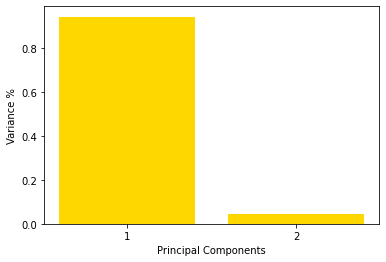

In [806]:
# Plotting the variances for each PC
import matplotlib.pyplot as plt

PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

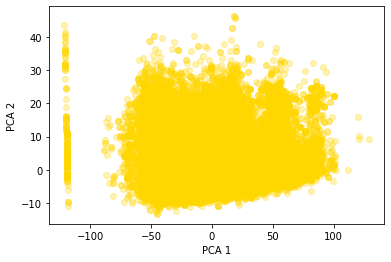

In [807]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

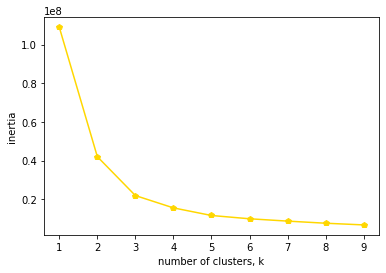

In [808]:
from sklearn.cluster import KMeans

inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
#plt.xticks(k)
plt.show()

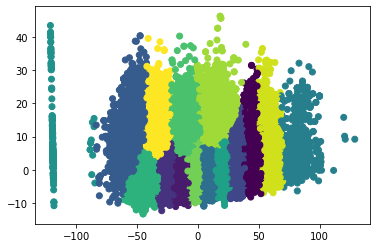

                0          1
0       22.125986   7.862206
1      -30.584420  -3.108995
2       -1.007756  -4.809314
3       25.080249   2.712221
4      -19.357036   0.266734
...           ...        ...
112622 -28.415394  13.608454
112623  17.908513  21.275961
112624 -16.047020  21.855751
112625 -40.455045  26.526805
112626 -31.460706  22.782030

[112627 rows x 2 columns]
[ 8  2 11 ... 10 14 14]


In [809]:
model = KMeans(n_clusters=15)
model.fit(PCA_components.iloc[:,:2])

# labels = model.predict(PCA_components.iloc[:,:2])
labels = model.predict(PCA_components)
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()
print(PCA_components)
print(labels)

In [810]:
#getting the labels in the new PCA Kmeans df
segm_kmeans = pd.concat([data_reordered.reset_index(drop=True)],axis=1)
#segm_kmeans.columns.values[-11:] = ["Component 1","Component 2","Component 3","Component 4","Component 5","Component 6","Component 7","Component 8","Component 9","Component 10","Component 11"]
segm_kmeans["Segment KMeans PCA"] = model.labels_
# segm_kmeans["Segment"] = segm_kmeans["Segment KMeans PCA"].map({0:"Cluster 1",1:"Cluster 2",2:"Cluster 3",3:"Cluster 4",4:"Cluster 5"})
#segm_kmeans["Segment"] = segm_kmeans["Segment KMeans PCA"].map({0:"Cluster 1",1:"Cluster 2",2:"Cluster 3",3:"Cluster 4",4:"Cluster 5",5:"Cluster 6",6:"Cluster 7",7:"Cluster 8"})

segm_kmeans["Segment"] = segm_kmeans["Segment KMeans PCA"].map({0:"Cluster 1",1:"Cluster 2",2:"Cluster 3",3:"Cluster 4",4:"Cluster 5",5:"Cluster 6",6:"Cluster 7",7:"Cluster 8",8: "Cluster 9",9: "Cluster 10", 10: "Cluster 11", 11: "Cluster 12",12: "Cluster 13", 13: "Cluster 14", 14: "Cluster 15"})

segm_kmeans


,id,name,artist,energy,danceability,acousticness,instrumentalness,mode,liveness,key,tempo,valence,loudness,speechiness,Segment KMeans PCA,Segment
0,5mnvqisoDJilY0uCEdT8rG,Danny's Song,Loggins & Messina,0.19800,0.507,0.806000,0.000000,1,0.1020,2,141.261,0.6010,-16.089,0.0324,8,Cluster 9
1,5sY2beqWPiCRmTyjEkRPPZ,To Find A Friend,Tom Petty,0.67300,0.542,0.021400,0.000444,1,0.2810,5,88.039,0.5050,-8.080,0.0296,2,Cluster 3
2,2Y90nL1ohB4sgYELDs7uNx,Glory Days,Bruce Springsteen,0.96000,0.574,0.045700,0.000000,1,0.1210,9,117.486,0.9780,-4.906,0.0320,11,Cluster 12
3,0sDqo9UPzPUtu9wEkI3zRB,The Weight - Remastered,The Band,0.51900,0.630,0.225000,0.000004,1,0.0974,9,143.942,0.5020,-10.997,0.0528,8,Cluster 9
4,24NwBd5vZ2CK8VOQVnqdxr,Sweet Emotion,Aerosmith,0.76000,0.380,0.002980,0.029400,1,0.1040,9,99.437,0.4910,-10.961,0.0378,1,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112622,6KECEaBJjz7sz6One95awg,Lipgloss Application Pt. 1,Slight Sounds ASMR,0.24500,0.647,0.006510,0.000116,1,0.3240,1,91.101,0.0576,-24.567,0.4960,14,Cluster 15
112623,1WKMPkedR3z44hL8QifjOT,Anticipatory Ear to Ear Whispers Pt.1,Slight Sounds ASMR,0.01010,0.601,0.000684,0.169000,1,0.3090,1,137.771,0.0739,-29.725,0.1730,12,Cluster 13
112624,1ojOiN5E7NArWPkSqzojwT,Anticipatory Ear to Ear Whispers Pt.2,Slight Sounds ASMR,0.00416,0.560,0.002830,0.087700,1,0.1310,1,103.896,0.0893,-32.141,0.1380,10,Cluster 11
112625,01Zuq3xB12zBwqfbPT55r8,Making Your Eyes Heavy,fastASMR,0.13100,0.506,0.197000,0.000734,0,0.2220,10,79.787,0.0367,-38.382,0.0969,14,Cluster 15


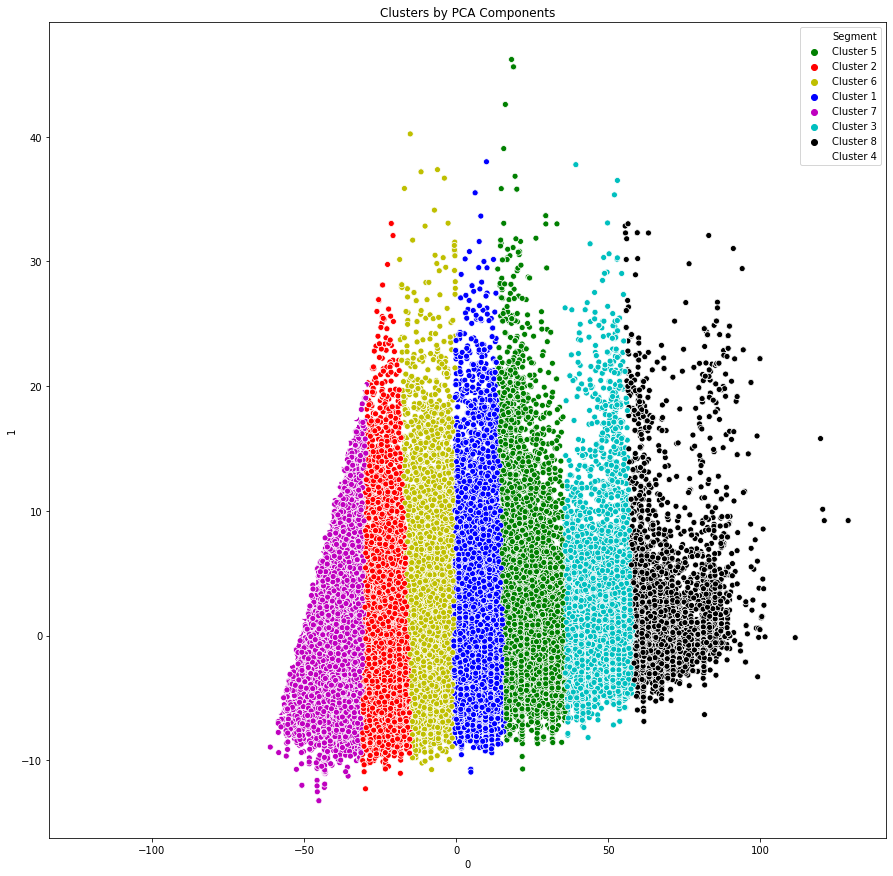

In [755]:
#visualization PCA Kmeans result
%matplotlib inline
import seaborn as sns

x_axis = PCA_components[0]
y_axis = PCA_components[1]
plt.figure(figsize=(15,15))
# sns.scatterplot(x_axis,y_axis,hue = segm_kmeans["Segment"],palette = ['g','r','b','y','m'])
sns.scatterplot(x_axis,y_axis,hue = segm_kmeans["Segment"],palette = ['g','r',"y",'b','m','c','k','w'])

plt.title("Clusters by PCA Components")
plt.show()

In [811]:
from sklearn.preprocessing import StandardScaler
# std_audio = StandardScaler().fit_transform(searched_track[cols_to_standardize]) # normalizing the data
# pca = PCA(n_components=1)
principleComponents = pca.transform(searched_track[cols_to_standardize])
PCA_components = pd.DataFrame(principleComponents)
# print(model.predict(PCA_components.iloc[:,:2]))
print(model.predict(PCA_components))
PCA_components

[8]


,0,1
0,15.921808,5.202112


In [813]:
x = segm_kmeans[segm_kmeans["Segment KMeans PCA"] == 8]
y = x.iloc[:, : 3].sample(n=30)
y
x.iloc[:, : 3]

,id,name,artist
0,5mnvqisoDJilY0uCEdT8rG,Danny's Song,Loggins & Messina
3,0sDqo9UPzPUtu9wEkI3zRB,The Weight - Remastered,The Band
6,1Pd1h30mgU05QkWYhgFzwt,Turn to Stone,Electric Light Orchestra
15,26uHwSHlaK5mskSMhbRod3,Luckiest Man,The Wood Brothers
18,1oG2vWELiGjIqxwqGcyqwF,You Really Got Me,The Kinks
...,...,...,...
112526,3z6m2FukK7Vd5xYrjOLDLR,I'm Into Something Good,Herman's Hermits
112527,5IMtdHjJ1OtkxbGe4zfUxQ,Escape (The Pina Colada Song),Rupert Holmes
112547,6N1EjQjnvhOjFrF6oUmGPa,Summer Of '69,Bryan Adams
112560,1udKn1oNKYQSQ9OmiIWCMu,Do You Believe in Magic?,The Lovin' Spoonful
